In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset desde la misma carpeta donde está este notebook
df = pd.read_csv('gym_churn_us.csv')

#Inspección inicial
print(df.info())
print(df.describe())

#Observa los valores medios de las características en dos grupos
print("\nValores medios por grupo de 'Churn':")
print(df.groupby('Churn').mean().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

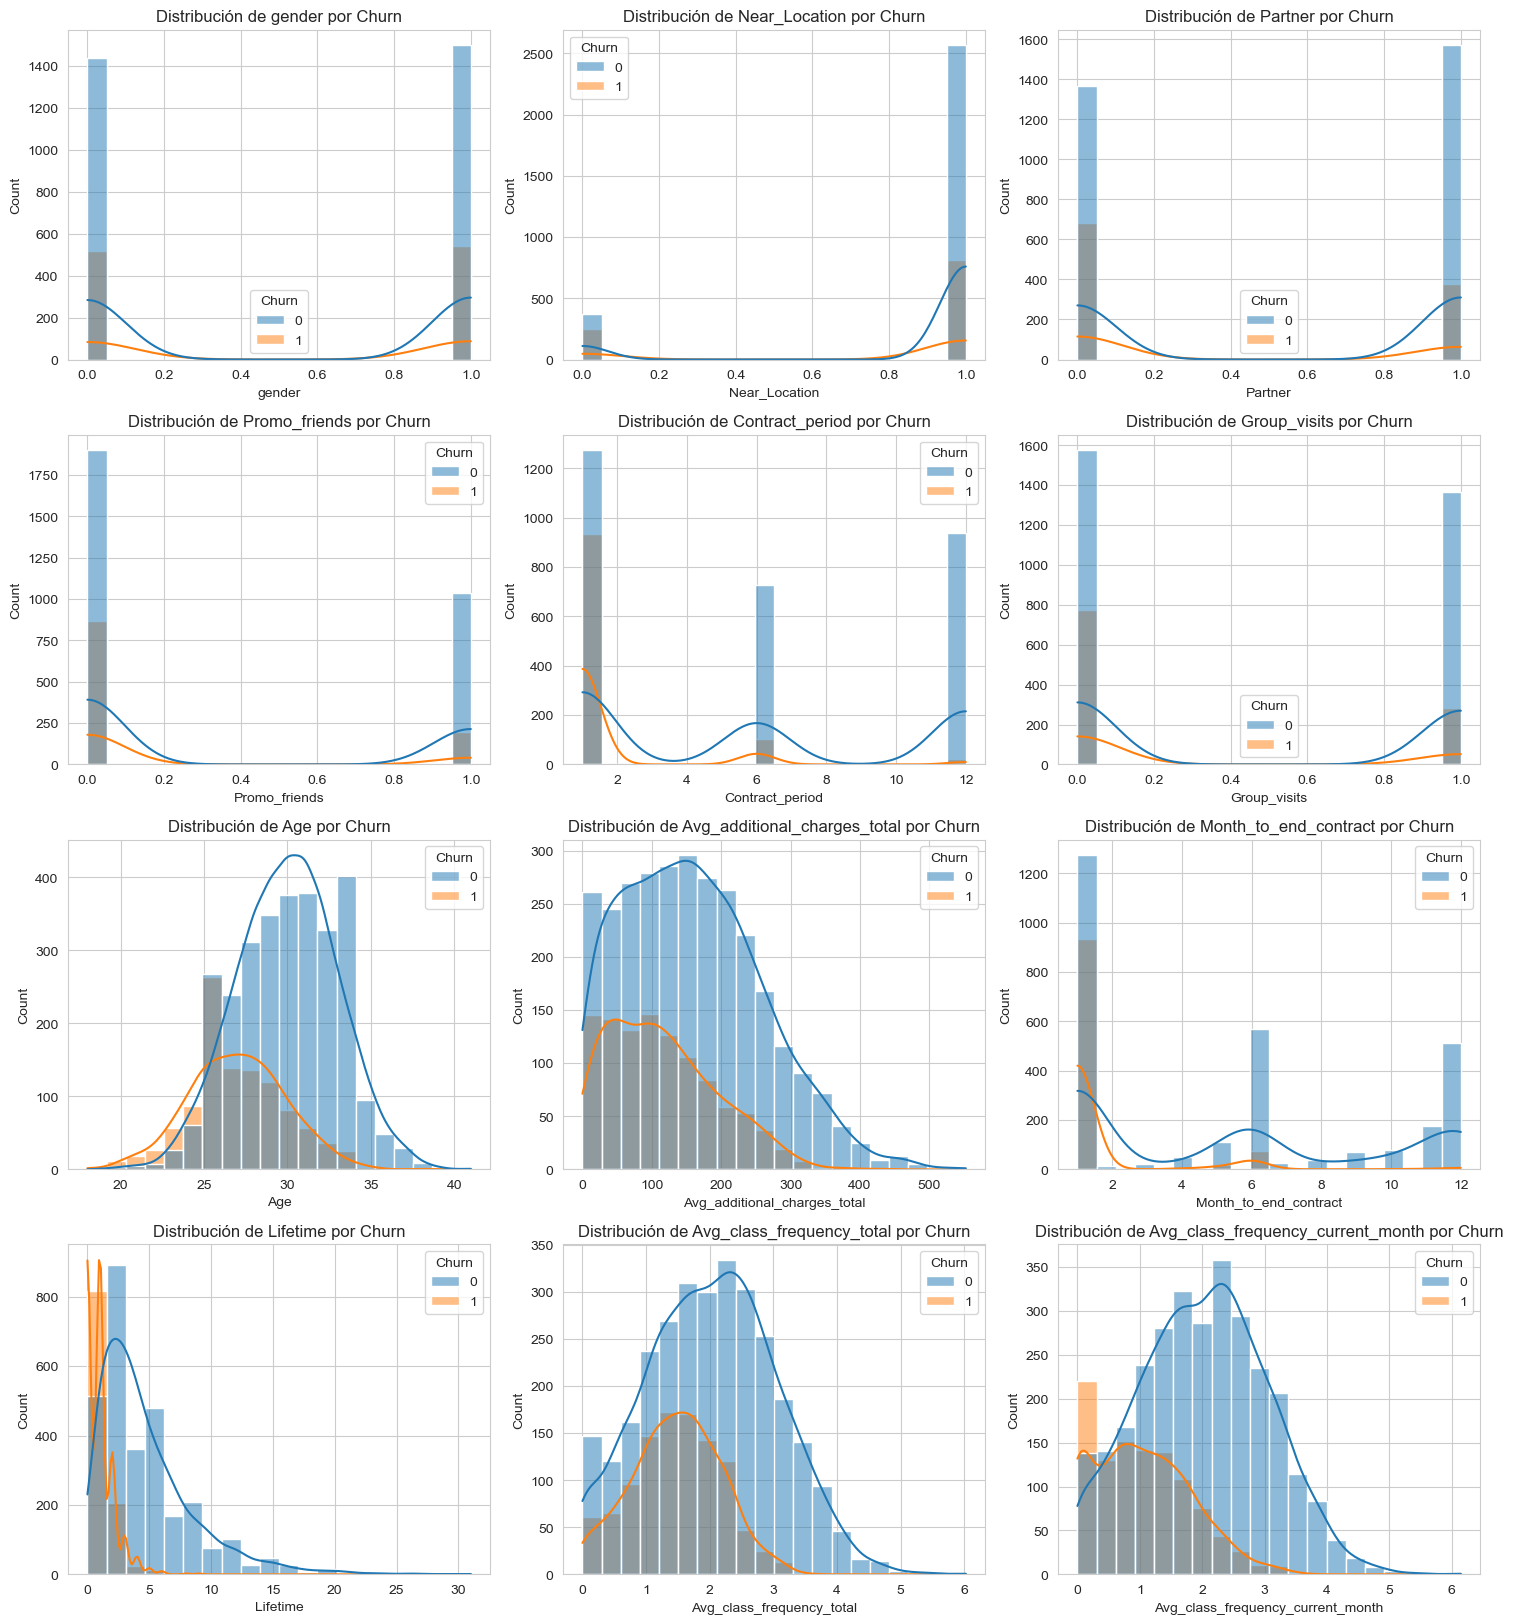

In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv('gym_churn_us.csv') #Carga 

# Configuración básica de Matplotlib/Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(15,20))

#Lista de columnas para trazar ('Churn' y 'Phone')
cols_to_plot = [col for col in df.columns if col not in ['Churn', 'Phone']]
n_rows = 5
n_cols = 3

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    #Se traza la distribución del feature 'col', diferenciando por 'Churn'
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=20)
    plt.title(f'Distribución de {col} por Churn')
plt.tight_layout()
plt.show()

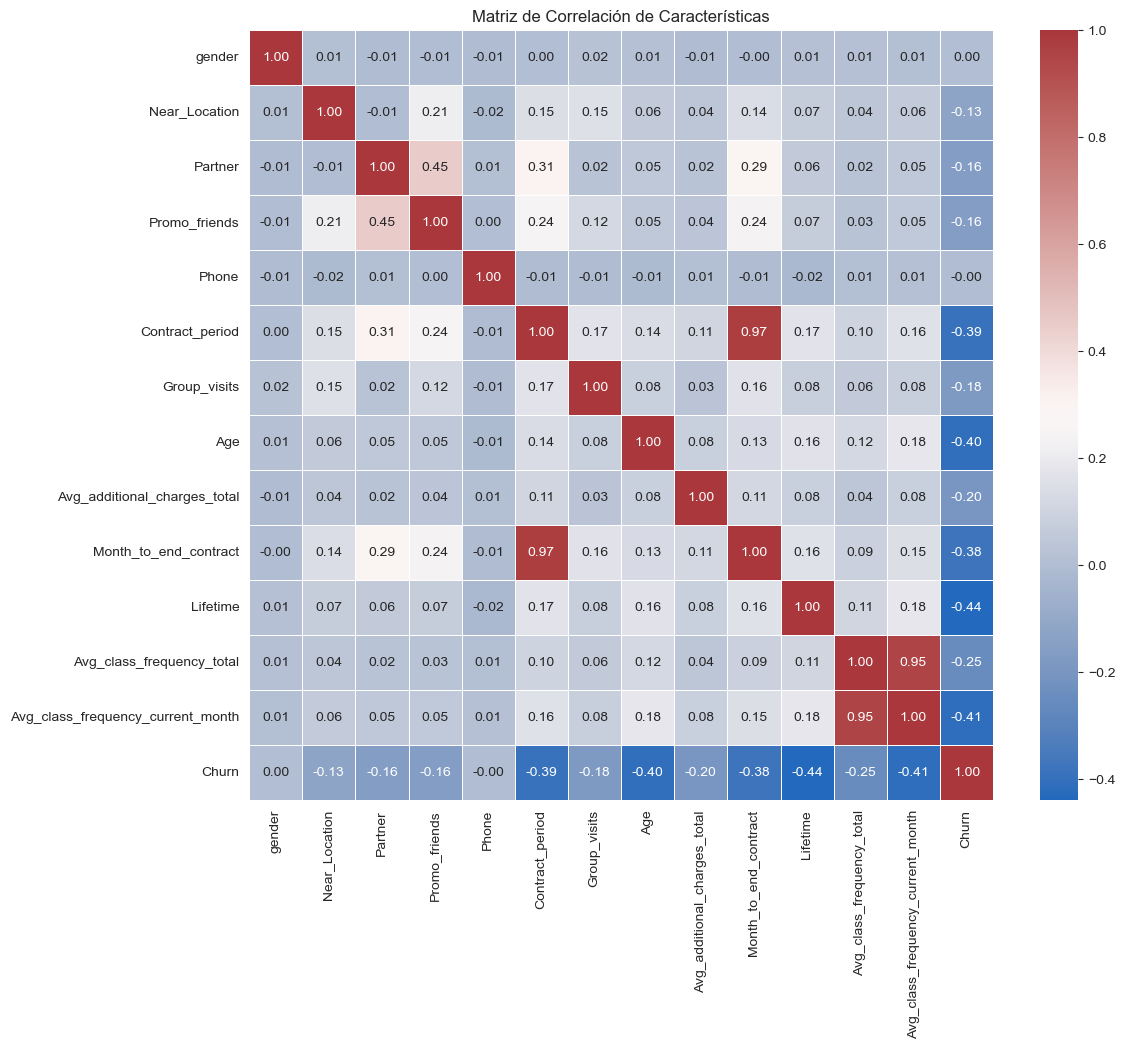

In [5]:
#Se calcula la matriz de correlación 
cm = df.corr()

#Trazar la matriz de correlación usando un mapa de calor 
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2f', linewidths=.5, cmap='vlag')
plt.title('Matriz de Correlación de Características')
plt.show()

In [6]:
# Analizar la correlación con la variable objetivo 'Churn'
print("Correlación de las Características con 'Churn':")
# Extraer la columna 'Churn' de la matriz de correlación y ordenarla por valor absoluto
churn_corr = df.corr()['Churn'].sort_values(ascending=False)
print(churn_corr)

Correlación de las Características con 'Churn':
Churn                                1.000000
gender                               0.000708
Phone                               -0.001177
Near_Location                       -0.128098
Partner                             -0.157986
Promo_friends                       -0.162233
Group_visits                        -0.175325
Avg_additional_charges_total        -0.198697
Avg_class_frequency_total           -0.249715
Month_to_end_contract               -0.381393
Contract_period                     -0.389984
Age                                 -0.404735
Avg_class_frequency_current_month   -0.412348
Lifetime                            -0.438220
Name: Churn, dtype: float64


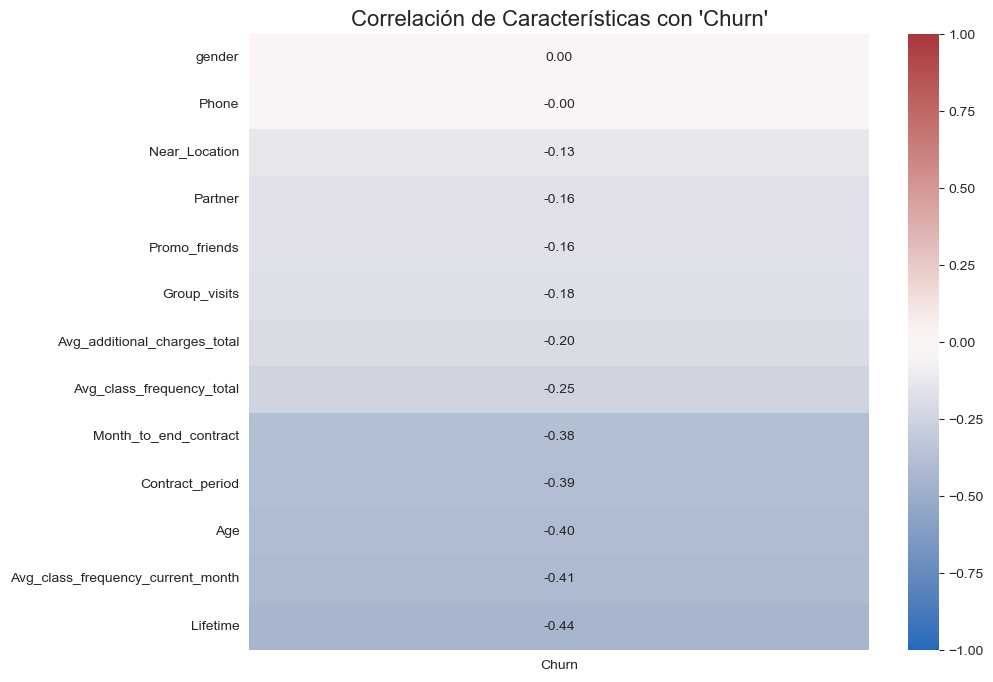

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 1. Calcular la matriz de correlación completa
matriz_corr = df.corr()

# 2. Extraer solo la serie de 'Churn', eliminar su propia correlación (1.0)
#    y convertirla en un DataFrame (N x 1) para que Seaborn pueda graficarla.
#    Usamos .drop('Churn') porque la correlación de Churn consigo mismo no es útil.
churn_corr_df = pd.DataFrame(matriz_corr['Churn'].drop('Churn'))

# 3. Opcional: Ordenar los valores para que el gráfico sea más limpio
churn_corr_df = churn_corr_df.sort_values(by='Churn', ascending=False)

# 4. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))  # Ajusta el tamaño (ancho, alto) según necesites

# 5. Crear el mapa de calor específico para 'Churn'
sns.heatmap(
    churn_corr_df,       # Tus datos (el DataFrame N x 1)
    annot=True,          # Mostrar los números dentro de las celdas
    fmt='.2f',           # Formatear los números a 2 decimales
    cmap='vlag',         # Usar un mapa de color "divergente" (rojo=negativo, azul=positivo)
    vmin=-1,             # Fijar el mínimo de la barra de color en -1
    vmax=1,              # Fijar el máximo de la barra de color en 1
    cbar=True            # Mostrar la barra de color
)

# 6. Añadir un título
plt.title("Correlación de Características con 'Churn'", fontsize=16)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np #Importa numpy para el random_state si no está

#Definir X (características) y y (objetivo)
X = df.drop('Churn', axis=1) #Elimina la columna 'Churn'
y = df['Churn']

#Dividir los datos 
#Se usa un tamaño de test del 20% 
#¡Importante! Usar random_state para reproducibilidad 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#stratify=y asegura que la producción de Churn sea similar en train y test
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Tamaño de X_train: (3200, 13)
Tamaño de X_test: (800, 13)


In [10]:
#Modelo Regresión Logística 
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("---Evaluación de Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"Recall: {recall_score(y_test, lr_predictions):.4f}")

#Modelo Bosque Aleatorio (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\n--- Evaluación de Bosque Aleatorio ---")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rf_predictions):.4f}")
print(f"Recall: {recall_score(y_test, rf_predictions):.4f}")

---Evaluación de Regresión Logística ---
Accuracy: 0.9263
Precision: 0.8923
Recall: 0.8208

--- Evaluación de Bosque Aleatorio ---
Accuracy: 0.9275
Precision: 0.8850
Recall: 0.8349


In [11]:
# Verificar el balanceo de clases en el conjunto de prueba
print("Balanceo de Clases en y_test:")
print(y_test.value_counts(normalize=True))

# 0: Clientes que NO cancelaron (Se quedaron)
# 1: Clientes que SÍ cancelaron (Churn)

Balanceo de Clases en y_test:
0    0.735
1    0.265
Name: Churn, dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

#Dejar de lado la columna 'Churn'
X = df.drop('Churn', axis=1)

#Estandarizar los datos
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

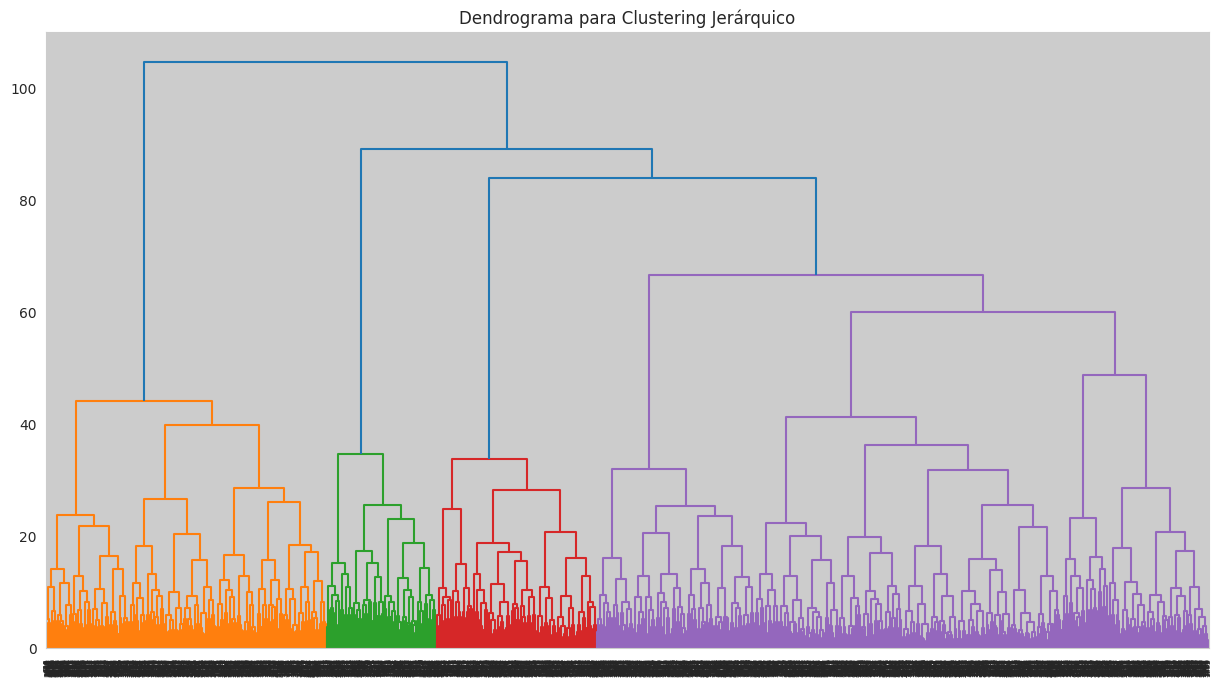

In [10]:
#Crear la matriz de distancias (método 'ward' minimiza la varianza dentro de los clústeres)
linked = linkage(X_st, method='ward')

#Trazar el dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top')
plt.title('Dendrograma para Clustering Jerárquico')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# PASO A: Preparación y Estandarización de los Datos
# Asegúrate de que 'df' sigue siendo tu DataFrame cargado
X = df.drop('Churn', axis=1) # Dejar de lado la columna 'Churn'

scaler = StandardScaler()
X_st = scaler.fit_transform(X) # Estandarizar los datos

# PASO B: Entrenamiento de K-Means y Predicción
# ¡CORRECCIÓN! Cambiar n_init='auto' a n_init=10
km_model = KMeans(n_clusters=5, random_state=42, n_init=10) 
km_model.fit(X_st)

# Predecir los clústeres para cada cliente
df['cluster_km'] = km_model.labels_

# PASO C: Análisis de los Clústeres
print("\n--- Valores Medios de Características por Clúster ---")
cluster_means = df.groupby('cluster_km').mean().T
print(cluster_means)

print("\n--- Tasa de Cancelación (Churn Rate) por Clúster ---")
churn_rate_by_cluster = df.groupby('cluster_km')['Churn'].mean()
print(churn_rate_by_cluster)


--- Valores Medios de Características por Clúster ---
cluster_km                                  0           1           2  \
gender                               0.502370    0.554556    0.499422   
Near_Location                        0.949447    0.849269    0.937572   
Partner                              0.829384    0.263217    0.737572   
Promo_friends                        0.998420    0.052868    0.478613   
Phone                                1.000000    1.000000    1.000000   
Contract_period                      3.097946    2.606299   11.854335   
Group_visits                         0.448657    0.436445    0.546821   
Age                                 29.104265   30.008999   29.905202   
Avg_additional_charges_total       141.774331  159.774265  163.509804   
Month_to_end_contract                2.887836    2.419573   10.812717   
Lifetime                             3.772512    4.780652    4.677457   
Avg_class_frequency_total            1.770536    2.745505    2.006405

Modelo Predictivo: El modelo de Bosque Aleatorio (Random Forest) fue el que mejor se desempeñó, logrando un Recall del 83.49%. Esto significa que es la mejor herramienta para identificar preventivamente a los clientes en riesgo de cancelación, permitiendo una intervención proactiva.

Segmentación de Riesgo: El análisis de K-Means identificó claramente dos grupos de alto riesgo:

    -Clúster 3 (Riesgo Extremo): Clientes con la tasa de Churn más alta (≈57%). Son clientes nuevos (el Lifetime más bajo, 2.1 meses), con contratos cortos y la frecuencia de asistencia más baja (menos de 1 vez por semana).

    -Clúster 4 (Riesgo No Contactable): Clientes con Churn alto (≈27%) y que se distinguen por no haber proporcionado su número de teléfono, lo que complica las acciones directas de retención.

Segmentación de Lealtad: El Clúster 2 (≈2.2% Churn) es el grupo más leal. Se caracteriza por tener contratos de muy largo plazo (casi un año), la mayor edad promedio y altos gastos adicionales (cafetería, masajes, etc.), lo que indica un uso completo de las instalaciones y un alto compromiso.


Basados en el principio de que más compromiso y mayor tiempo de vida equivalen a menor Churn, se proponen tres principios esenciales y sus pasos de implementación:

Incentivar el Compromiso a Largo Plazo
La duración del contrato y el Lifetime son los predictores más fuertes de lealtad.

Acción Estratégica	Pasos de Marketing Específicos
Fomentar Contratos Anuales	Descuentos Escalonados: Ofrecer un descuento significativo o servicios premium (ej. 1 sesión de masaje gratuita) a los clientes de contratos de 1 año. El Clúster 2 demuestra que este es el perfil más leal.
Programa de Lealtad por Lifetime	Crear un programa que recompense a los clientes con 4 o más meses de antigüedad (el umbral donde el Churn comienza a bajar), ofreciendo equipamiento gratuito o merchandising de edición limitada.

Principio 2: Intervención Temprana y Frecuencia de Asistencia
El Clúster 3 muestra que la fase crítica es el inicio de la membresía y la baja asistencia.

Acción Estratégica	Pasos de Marketing Específicos
Alertas de Bajo Uso (Modelo Predictivo)	Utilizar el modelo Bosque Aleatorio para activar una alerta automática para cualquier cliente en sus primeros 3 meses con una frecuencia de clase inferior a 1 vez por semana.
Activación de Clientes de Riesgo	Alerta temprana: Enviar correos o SMS a los clientes de alto riesgo ofreciendo una sesión de entrenamiento personal gratuita o una invitación a una clase grupal exclusiva para reengancharlos.

Principio 3: Maximizar el Valor y la Información del Cliente
El gasto adicional y la información de contacto son esenciales para la retención y la rentabilidad.

Acción Estratégica	Pasos de Marketing Específicos
Promover Servicios Adicionales	Crear un "Paquete de Bienestar" con descuento que combine membresía y servicios auxiliares (cafetería, masajes). El Clúster 2 demuestra que estos clientes son más leales y rentables.
Incentivar Datos de Contacto	Ofrecer un pequeño regalo o un cupón de cafetería a cambio de proporcionar o actualizar el número de teléfono a los clientes de bajo engagement (como el Clúster 4) para incluirlos en las campañas de retención.